# Final project
## 1. Dataset
My dataset is [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).<br>
Link to the GitHub [see](https://raw.githubusercontent.com/loopiiu/datasets/main/healthcare-dataset-stroke-data.csv).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data = pd.read_csv('C:\\Users\\Acer\\Desktop\\finals\\healthcare-dataset-stroke-data.csv')
data=pd.read_csv('https://raw.githubusercontent.com/loopiiu/datasets/main/healthcare-dataset-stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## 2. Introduction
**Stroke** is the second by frequency leading cause of death out of diseases worldwide.<br>
5.5 million people die of stroke every year, and due to statistics, every 4th person aged over 25 
will suffer a stroke in their lifetime.

**More common among:**
<ul>
    <li>men</li>
    <li>women using birth control</li>
    <li>people with diabetes</li>
    <li>people with high blood pressure</li>
    <li>people with heart disease</li>
    <li>people who smoke</li>
</ul>
<h3>Objectives </h3>
<br>
In this dataset we are given the data about patient personal information, such as gender, age, occupation ans etc.<br>
With a help of this information, I am going to predict who is more likely to get stroke.

## 3. Data description

This dataset consists of 5110 rows and 12 columns.

In [3]:
data.shape

(5110, 12)

Given columns:

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<h3>Attributes:</h3>
<ol>
    <li> <b>id:</b> Identification number</li>
<li> <b>gender:</b> "Male", "Female", "Other"</li>
<li> <b>age:</b> Patient age</li>
<li> <b>hypertension:</b> 0 - absense, 1 - presense</li>
<li> <b>heart_disease:</b> 0 - absense, 1 - presense</li>
<li> <b>ever_married:</b> "No", "Yes"</li>
<li> <b>work_type:</b> Occupation type<br>"Govt_jov", "Never_worked", "Private", "Self-employed", "children"
    <li><b>Residence_type:</b> "Rural", "Urban"</li>
<li> <b>avg_glucose_level:</b> Average glucose level in blood</li>
<li> <b>bmi:</b> Body Mass Index(BMI)</li>
<li> <b>smoking_status:</b> "smokes", "never smoked", "formerly smoked", "Unknown"</li>
<li> <b>stroke:</b> 0 - if hadn't, 1 - if had</li>The most important column in the dataset.
</ol>

We have got 7 numerical and 5 categorical variables.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Find the number of unique values.

In [6]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

I urge you to see the correlation between columns via heatmap.

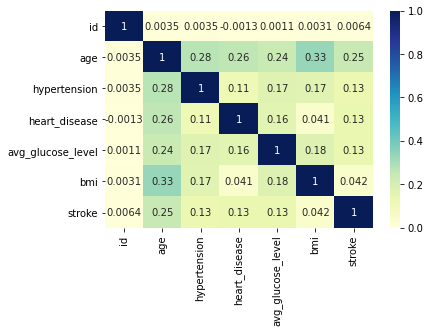

In [7]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

From correlation graph, it is seen that there is a interconnection between age and bmi.

## 4. Research questions

<b>Q1:</b> Is there any impact of an **age** in getting a stroke? (what about the gender distribution?)<br>
<b>Q2:</b> What about other factors, such as **hypertension, heart diseases, and maritial status** statistics among those who had a stroke?<br>
<b>Q3:</b> Impact of the features, as **bmi** and **average glucose level** on stroke, and correlation between them. <br>
<b>Q4:</b> **Smoking habits** and **residence type** as a factor of getting a stroke.<br>
<b>Q5:</b> Which **type of workers** are more likely to be under the risk of a stroke?

## 5. Data prepartion

Change column names to lower case. Because "Residence_type" starts from uppercase.

In [8]:
data.columns = data.columns.str.lower()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Checking for null values.

In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that there is only "bmi" column's values are missing. 

In [10]:
# number of missing column's percentage
(201/5110)*100

3.9334637964774952

In statistical methods, If the percentage is lower than 5%, it means that we can replace missing values with the mean value.
We need this kind of way, due to the fact that our dataset is not big enough, and dropping these values will be a lost for our analysis.

In [11]:
mean = data.bmi.mean() #mean age value
print('Mean:', mean)
data.bmi.fillna(value=mean, inplace=True) # filling missing values with a mean
data.isnull().sum()

Mean: 28.893236911794673


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check for duplicated values.

In [12]:
data.duplicated().sum()

0

We have got only one instance where gender is 'Other'. Thus we can drop it.

In [13]:
data[data.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Checking whether row was dropped.

In [14]:
data.drop(data[data.gender=='Other'].index, inplace=True)
data.shape 

(5109, 12)

We can drop **id** column. Because values are not so importanat. They do not give us any additional information.

In [15]:
data.drop(columns=['id'], inplace=True)
data.shape

(5109, 11)

## 6. Data Analysis and Visualisation

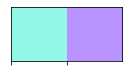

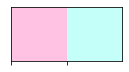

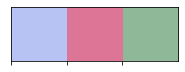

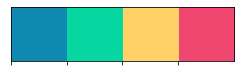

In [16]:
# some color palettes for my graphics
colors1=['#91F9E5','#B892FF']
colors2=['#FFC2E2','#C4FFF9']
colors3 = ['#B7C3F3', '#DD7596', '#8EB897']
colors4=['#118AB2','#06D6A0','#FFD166','#EF476F']
colors5=['#50C9CE','#72A1E5','#9883E5','#FCD3DE']

sns.palplot(sns.color_palette(colors1))
sns.palplot(sns.color_palette(colors2))
sns.palplot(sns.color_palette(colors3))
sns.palplot(sns.color_palette(colors4))
plt.show()

In [17]:
# creating separate dataframe for those who had and hadn't stroke
had=data[data.stroke==1]
hadnot=data[data.stroke==0]

In [18]:
data.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

<h3><b>6.1 Q1:</b></h3>

In [19]:
# some values for analysis
r1 = round(data[data.stroke==0].age.mean(), 2)
r2 = round(data[data.stroke==1].age.mean(), 2)
r3 = round(had[had.gender=='Female'].age.mean(), 2)
r4 = round(had[had.gender=='Male'].age.mean(), 2)

labels=['No Stroke', 'Stroke']

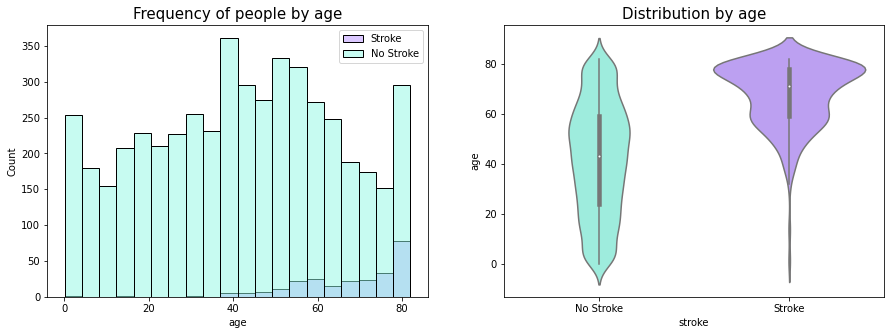

Mean age for those who had not stroke:  41.97
Mean age for those who had stroke:  67.73


In [20]:
fig, ((axes1,axes2)) = plt.subplots(1,2, figsize=(15,5))

# 1st graph
sns.histplot(data = data, 
             x = 'age', 
             hue='stroke', 
             ax = axes1, 
             palette=colors1
            )
axes1.set_title('Frequency of people by age', fontsize=15)
axes1.legend(labels=['Stroke', 'No Stroke'])

#2nd graph
sns.violinplot(x=data['stroke'], 
               y=data['age'], 
               ax = axes2, 
               palette=colors1
              )
axes2.set_title('Distribution by age', fontsize=15)
axes2.set_xticklabels(labels)

plt.show()

# mean values
print('Mean age for those who had not stroke: ', r1)
print('Mean age for those who had stroke: ', r2)

From the graph above, there is an obvious illustration that people who had stroke are appoximately older than 40 years old, and the mean age for that people is **67.73**. Moreover from the right and left graphs, we can clearly see a consistent pattern, that the older you are, the more likely for you to get a stroke. The highest amount of strokes fall on 70-80 years old people, **88** person, nearly **35%** of all people who had a stroke.

In [21]:
# number of people who is older than 70 and younger than 80, and had stroke
data[(data.stroke==1) & (data.age>70) & (data.age<80)].stroke.count()

88

Let's go further and see any regularity by gender spread.

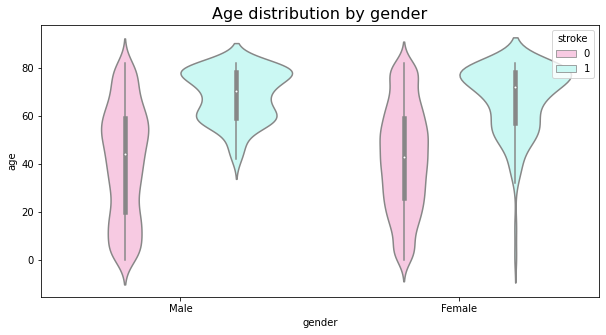

Mean age for those who had stroke (Female):  67.14
Mean age for those who had stroke (Male):  68.5


In [22]:
plt.figure(figsize=(10,5))

ax = sns.violinplot(data = data, 
                    x = 'gender', 
                    y = 'age',
                    hue='stroke', 
                    palette=colors2)

ax.set_title('Age distribution by gender', fontsize=16)
plt.show()

print('Mean age for those who had stroke (Female): ', r3)
print('Mean age for those who had stroke (Male): ', r4)

Let's take a deeper look at the same graph as a second one, but with one additional parameter - **gender**. There is seen that men under the risk of stroke are approximately older than 40, while in women there exists cases(8 female) earlier than 40. 

In [23]:
# number of people younger than 40 by gender
print(had[(had.age<40) & (had.gender=='Female')].stroke.count())
print(had[(had.age<40) & (had.gender=='Male')].stroke.count())

8
0


<h3><b>6.1 Q2:</b></h3>

In [24]:
# data preparation for Q2
label1 = ['No hypertension', 'Hypertension']
label2 = ['No heart disease', 'Heart disease']
label3 = ['Ever married', 'Not married']

hypertension = had.hypertension.value_counts()
heart_disease = had.heart_disease.value_counts()
ever_married = had.ever_married.value_counts()

exp = (0, 0.1) # separates two parts of the pie chart

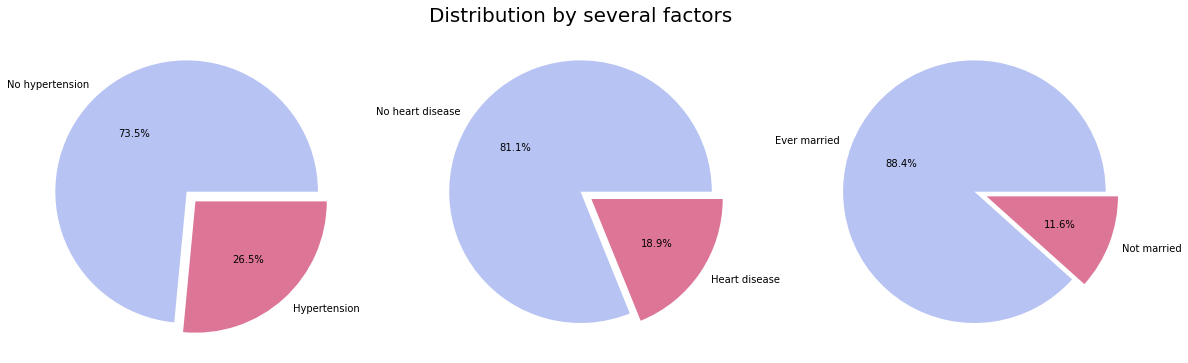

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

# 1st graph
axes[0].pie(hypertension, 
            labels=label1, 
            colors=colors3, 
            explode=exp, 
            autopct='%1.1f%%')

# 2nd graph
axes[1].pie(heart_disease, 
            labels=label2, 
            colors=colors3,  
            explode=exp, 
            autopct='%1.1f%%')

# 3rd graph
axes[2].pie(ever_married, 
            labels=label3, 
            colors=colors3,  
            explode=exp,
            autopct='%1.1f%%')

axes[1].set_title('Distribution by several factors', fontsize=20)

plt.show()

In the pie charts upwards, we can seeminlgy state the fact of hypertension and heart disease don't affect on getting a stroke in any ways. However, the high percentage of the people who have been married had a stroke. Thus, if you have ever been married, you are more likely to be under the risk of a stroke, unlike when you are not married.

<h3><b>6.1 Q3:</b></h3>

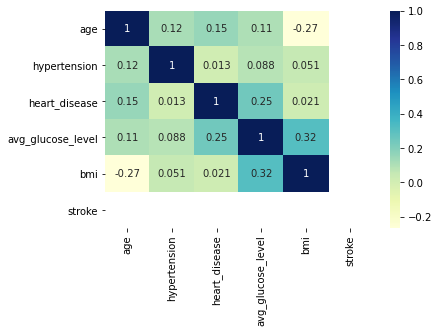

In [26]:
# see a correlation between columns where stroke=1
sns.heatmap(had.corr(), cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows that there is a relation between **'avg_glucose_level'** and **'bmi'** columns. Let's check this relation.

In [27]:
# colors
c1='#94d2bd'
c2='#7b2cbf'

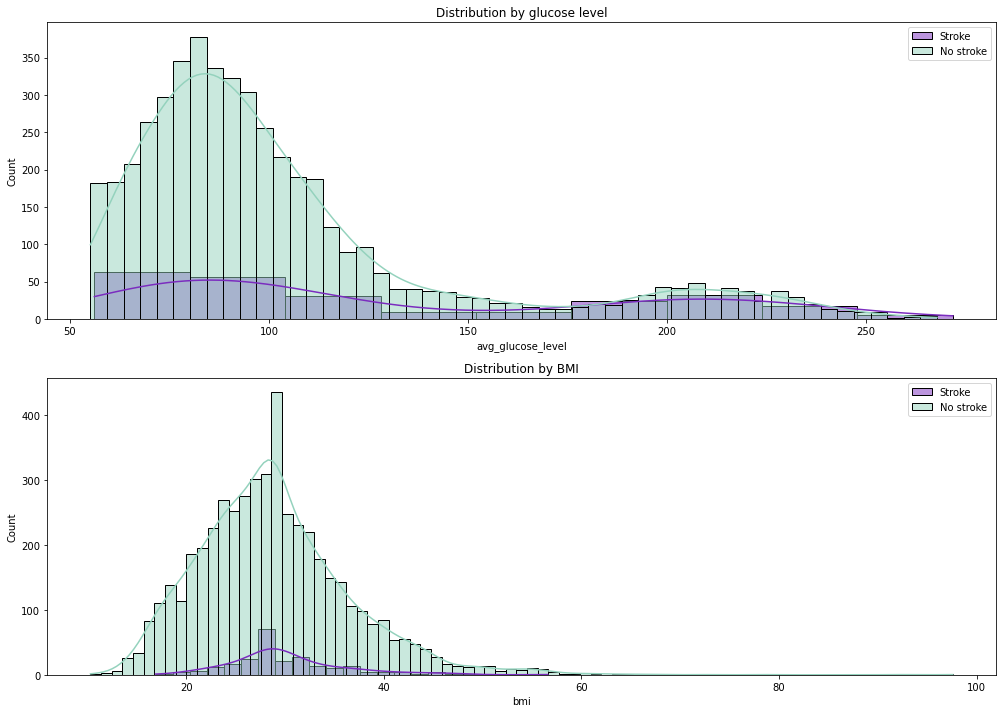

In [28]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(17,12))

# 1st row
sns.histplot(data=had, 
             x="avg_glucose_level", 
             color=c2, label="Stroke", 
             kde=True, 
             ax=ax1)

sns.histplot(data=hadnot, 
             x="avg_glucose_level", 
             color=c1, 
             label="No stroke", 
             kde=True, 
             ax=ax1)

ax1.legend()
ax1.set_title('Distribution by glucose level')

# 2nd row
sns.histplot(data=had, 
             x="bmi", 
             color=c2, 
             label="Stroke", 
             kde=True, 
             ax=ax2)

sns.histplot(data=hadnot, 
             x="bmi", 
             color=c1, 
             label="No stroke", 
             kde=True, 
             ax=ax2)

ax2.legend()
ax2.set_title('Distribution by BMI')

plt.show()

The graphs above depict average glucose level and bmi parameters distributed by the presense of a stroke. The lines of ups and downs in both charts for those who had and had not a stroke resemble each other.<br>
In the first graph, the most recurring glucose levels are between 50 and 100, for both parameters.<br>
In the second graph, the most freguent bmi values are between 25 and 35.

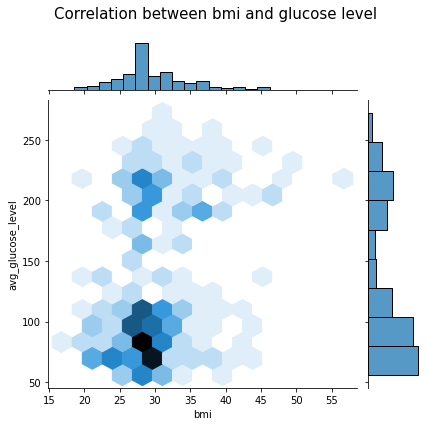

In [29]:
# the relationship between 2 columns mentioned above
a = sns.jointplot(data=had, 
              x='bmi', 
              y='avg_glucose_level', 
              kind='hex')

a.fig.suptitle('Correlation between bmi and glucose level', fontsize=15)
a.fig.subplots_adjust(top=0.9)
plt.show()

So the graph provides data on correlation of two graphs, and the most frequent value is painted dark blue.<br>
**'bmi'**  between 25 and 35<br>
**'avg_glucose level'**  between 50 and 100<br>
<h4>Let's make some calculations.</h4>

In [30]:
print(had[(had.bmi>25) & (had.bmi<35)].age.mean())
print(had[(had.avg_glucose_level<100)].age.mean())

67.68828402366864
66.46714285714286


The average age for both of those range of values is 66-67 y.o. It is the most frequent age occurence in cases where stroke is 1. Correlation is justified.

<h3><b>6.1 Q4:</b></h3>

In [31]:
# data preparation for Q4

size = had.smoking_status.value_counts() #smoking status of the people with their corresponding value where stroke=1
label = had.smoking_status.value_counts().index # smoking status indexes
urban = had[had.residence_type=='Urban'].smoking_status.value_counts().tolist() # number of people with 'Urban' residence type
rural = had[had.residence_type=='Rural'].smoking_status.value_counts().tolist() # number of people with 'Rural' residence type
x = np.arange(len(label)) # arranging by labels [0, 1, 2, 3]
width=0.37 # width

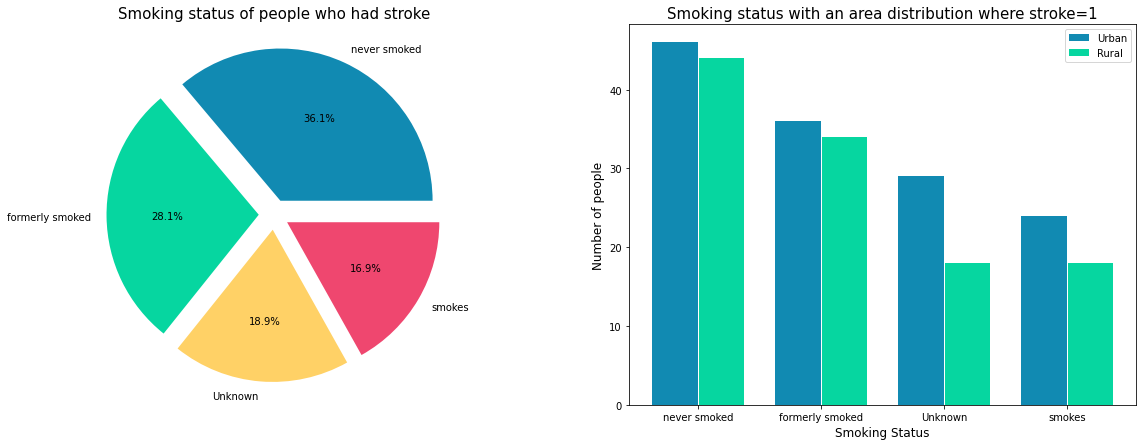

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

# 1st graph
axes[0].pie(size, 
            colors=colors4, 
            labels=label, 
            explode=(0.1, 0.1, 0.1, 0.1),
            autopct='%1.1f%%')

axes[0].set_title('Smoking status of people who had stroke', fontsize=15)

# 2nd graph
axes[1].bar(x-0.19, urban, width, label='Urban', color='#118AB2')
axes[1].bar(x+0.19, rural, width, label='Rural', color='#06D6A0')
plt.title('Smoking status with an area distribution where stroke=1', fontsize=15)
plt.xticks(x, label)
plt.ylabel("Number of people", fontsize=12)
plt.xlabel("Smoking Status", fontsize=12)
axes[1].legend()

plt.show()

Unknown category is for those people, where we don't know anything about their smoking habits.<br>For those who had a stroke, it is about **19%**. However, we can see that the percentage of the people who have never smoked is more that 1/3 of the people who had a stroke. Consequently, we are able to draw a conclusion that **smoking habits are not so important in predicting a stroke**.<br>
In the second bar graph, I wanted to see a difference between the place of living and smoking habits. Because of the fact that urban and rural people are evenly distributed, there is no any significant changes in the data.

In [33]:
had.residence_type.value_counts()

Urban    135
Rural    114
Name: residence_type, dtype: int64

<h3><b>6.1 Q5:</b></h3>

In [34]:
# grouping people by work_type where stroke=1
had[['stroke', 'work_type']].groupby(by='work_type', as_index=False).count().sort_values(by='stroke', ascending=False)

,work_type,stroke
1,Private,149
2,Self-employed,65
0,Govt_job,33
3,children,2


In [35]:
# grouping people by work_type where stroke=0
hadnot[['stroke', 'work_type']].groupby(by='work_type', as_index=False).count().sort_values(by='stroke', ascending=False)

,work_type,stroke
2,Private,2775
3,Self-employed,754
4,children,685
0,Govt_job,624
1,Never_worked,22


In [36]:
# mean age of people from different work sectors who had a stroke
had[['stroke', 'work_type', 'age']].groupby(by='work_type', as_index=False).age.mean().sort_values(by='age', ascending=False)

,work_type,age
2,Self-employed,71.338462
1,Private,67.241611
0,Govt_job,66.454545
3,children,7.660000


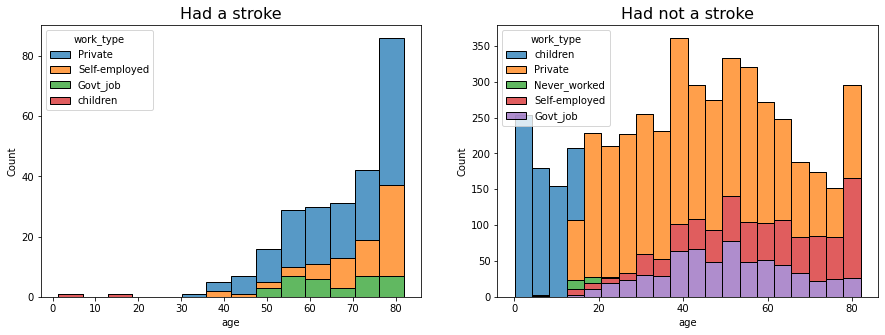

In [37]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(15,5))

# 1st graph
sns.histplot(data=had, 
             x="age", 
             hue="work_type", 
             multiple="stack", 
             ax=ax1)

ax1.set_title('Had a stroke', fontsize=16)

# 2nd graph
sns.histplot(data=hadnot, 
             x="age", 
             hue="work_type", 
             multiple="stack", 
             ax=ax2)

ax2.set_title('Had not a stroke', fontsize=16)

plt.show()

There is a clear illustration of that people who had a stroke are more likely to be from the private work sector, on the second place is self-employed, on the third govermental job. In the second graph, where stroke=0, private sector also dominate. In addition to that, in the fisrt graph there is no 'never_worked' category, unlike in the first one.

## 7. Conclusion

To conclude all the things said above, we covered all the parameters in dataset. So we can came to conclusion, that there are mainly 3 crucial factors in determining stroke, they are: **age**, **bmi**, and **average glucose level**. <br>Another factors, such as presense of heart disease, hypertension, or smoking habits can not be so important in determing a stroke. <br>However, this dataset is not big enough for making that king of desicions, and for proper analysis the bigger dataset is needed.